In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
### PRE_PROCESSING ###

# Loads images from 
# Resize image to 'new_pixels'
# Returns array of images and array of labels
def load_images_and_create_label(folder, new_pixels):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img, (new_pixels, new_pixels))
            images.append(img)
            if filename.find("cat") == -1:
                # dog 
                labels.append(1)
            else:
                # cat
                labels.append(0)
    return images, labels

In [3]:
### HELPER FUNCTIONS ###

# Sigmoid non-linearity
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initializes weights and biases with zeros
def init_with_zeros(dimension):

    w = np.zeros(shape = (dimension, 1))
    b = 0

    return w,b

In [4]:
def propogate(w, b, X, Y):

    # w - weights
    # b - bias
    # X - input label (px * px * 3, number of examples)
    # Y - output label

    m = X.shape[1] # number of examples

    A = sigmoid(np.dot(w.T, X) + b) # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))

    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    # saving local gradients for backpropagation
    grads = {"dw" : dw,
             "db" : db}

    return grads, cost

In [5]:
# Optimizes w and b by running gradient descent
def optimize (w, b, X, Y, number_iterations, learning_rate, print_cost = False):    

    costs = []

    for i in range(number_iterations):

        grads, cost = propogate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        # gradient descent
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    params = {"w" : w,
              "b" : b}

    grads = {"dw" : dw,
               "db" : db}

    return params, grads, costs

In [6]:
# Predicts whether the label is 0 or 1 based on learned weights and bias
def predict(w, b, X):

    m = X.shape[1] 
    w = w.reshape(X.shape[0], 1)

    Y_Prediction = np.zeros((1, m))

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):

        Y_Prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    return Y_Prediction

In [7]:
# Builds the logistic regression model using helper functions    
def model(X_train, Y_train, X_test, Y_test, number_iterations = 2000, learning_rate = 0.5, print_cost = False):


    # X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    # Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    # X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    # Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    # num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    # earning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    # print_cost -- Set to true to print the cost every 100 iterations
    
    # return value: d -- dictionary containing information about the model.
    
    # initialize parameters with zeros
    w,b = init_with_zeros(X_train.shape[0])

    # gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, number_iterations, learning_rate, print_cost)

    # retrieve parameters from "parameters" dictionary after training
    w = parameters["w"]
    b = parameters["b"]

    Y_Prediction_Test = predict(w, b, X_test)
    Y_Prediction_Train = predict(w, b, X_train)

    # print train/test Errors
    print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_Prediction_Train - Y_train)) * 100))
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_Prediction_Test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_Prediction_Test, 
         "Y_prediction_train" : Y_Prediction_Train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": number_iterations}

    return d

In [8]:
# load train images and labels
images_train,labels_train = load_images_and_create_label('/Users/rahulmadhyan/Documents/AI/Neural Networks/Vanilla NN/Data/train', 64)
images_train = np.array(images_train)
labels_train = np.array(labels_train)

# load test images and labels
images_test,labels_test = load_images_and_create_label('/Users/rahulmadhyan/Documents/AI/Neural Networks/Vanilla NN/Data/test1', 64)
images_test = np.array(images_test)
labels_test = np.array(labels_test)

# flatten dataset
images_train = images_train.reshape(images_train.shape[0], -1).T
images_test = images_test.reshape(images_test.shape[0], -1).T

#standaradize the dataset
images_train = images_train / 255
images_test = images_test / 255

model(images_train, labels_train, images_test, labels_test, 2000, 0.0005, True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.686262
Cost after iteration 200: 0.682418
Cost after iteration 300: 0.679644
Cost after iteration 400: 0.677470
Cost after iteration 500: 0.675690
Cost after iteration 600: 0.674188
Cost after iteration 700: 0.672893
Cost after iteration 800: 0.671756
Cost after iteration 900: 0.670745
Cost after iteration 1000: 0.669835
Cost after iteration 1100: 0.669010
Cost after iteration 1200: 0.668257
Cost after iteration 1300: 0.667564
Cost after iteration 1400: 0.666923
Cost after iteration 1500: 0.666328
Cost after iteration 1600: 0.665773
Cost after iteration 1700: 0.665252
Cost after iteration 1800: 0.664763
Cost after iteration 1900: 0.664301
Train accuracy: 60.32 %
Test accuracy: 52.400000000000006 %


In [ ]:
learning_rates = [0.0005, 0.005, 0.05]
models = {}
for i in learning_rates:
    print ("Learning rate is: " + str(i))
    models[str(i)] = model(images_train, labels_train, images_test, labels_test, number_iterations = 3000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

Learning rate is: 0.0005


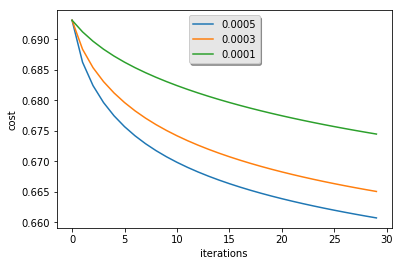

In [13]:
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()